## **Introduction: Business Problem**

A retail company(hypothetical) selling sporting goods, equipment, sports apparel, and much more, for various sporting activities, all under one roof.

Business is booming and the company has decided to expand its operations. For the same, the company is looking to setup stores in Florida, starting with the city of Tampa, Florida. However, the company wants to make this decision using a strategic and methodical approach.

Acknowledging the power of data and analytics, UP! Sports has decided to use a data science based approach to support their decision-making process for business expansion.

### **Task Description**
The task is to identify and group neighborhoods in the city of Tampa, Florida that the company must target and setup their operations and stores in. Since the company specializes in sports-related consumer goods, the ideal neighborhood(s) or groups of neighborhoods for the company would be neighborhoods with many sport-related facilities, such as gyms, yoga classes, soccer fields, and so on.

Thus, the task is to identify such neighborhoods and present an analysis, outlining which neighborhood(s) should UP! Sports setup their retail stores in, as well as the rationale behind the same.

### **Data Description ¶**
The data that will be used for this business use-case is location data for neighborhoods in Tampa, Florida, USA. This data will be collected through Wikipedia, along with the Foursquare API.

The Wikipedia page "Neighborhoods in Tampa, Florida" is scrapped.

Neighborhoods in Tampa, Florida:

Therefore, data for all neighborhoods in Tampa, including their names, respective boroughs and postal codes will be collected from Wikipedia by web scraping.

Further, data about all different venues in each neighborhood will be collected using the Foursquare Places API, using latitude and longitude values, which will be collected using geospatial data.

**The final data will include the following:**

Neighborhood name
Postal Code
Latitude and longitude values
Venues in each neighborhood
This data will be analyzed to provide a solution to the discussed business problem.



In [2]:
# For getting Wikipedia page from URL through get request
import requests

# For scraping information from the HTML source
!pip install bs4
from bs4 import BeautifulSoup

# To create the DataFrame for neighborhood data
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For handling arrays and vectors
import numpy as np

# Supress warnings
import warnings
warnings.filterwarnings('ignore')


Next, the Foursquare API is used to get data about venues near each neighborhood in Tampa. For this, the Foursquare API needs to be configured with the client ID and client secret.

In [3]:

dataset = [
    {"Neighborhood": "Hyde Park", "Postal Code": "33606, 33629", "Latitude": 27.9358, "Longitude": -82.4799},
    {"Neighborhood": "Soho District", "Postal Code": "33606", "Latitude": 27.9370, "Longitude": -82.4774},
    {"Neighborhood": "Channelside", "Postal Code": "33602", "Latitude": 27.9436, "Longitude": -82.4443},
    {"Neighborhood": "Downtown Tampa", "Postal Code": "33602", "Latitude": 27.9465, "Longitude": -82.4593},
    {"Neighborhood": "Ybor City", "Postal Code": "33605", "Latitude": 27.9620, "Longitude": -82.4375},
    {"Neighborhood": "Harbour Island", "Postal Code": "33602", "Latitude": 27.9414, "Longitude": -82.4584},
    {"Neighborhood": "Westshore District", "Postal Code": "33609, 33607", "Latitude": 27.9590, "Longitude": -82.5265},
    {"Neighborhood": "New Tampa", "Postal Code": "33647, 33637", "Latitude": 28.1639, "Longitude": -82.3632},
    {"Neighborhood": "South Tampa", "Postal Code": "33606, 33609, 33629", "Latitude": 27.9179, "Longitude": -82.4964},
    {"Neighborhood": "Carrollwood", "Postal Code": "33618, 33624", "Latitude": 28.0591, "Longitude": -82.5187},
    {"Neighborhood": "West Tampa", "Postal Code": "33607", "Latitude": 27.9635, "Longitude": -82.4859},
    {"Neighborhood": "Seminole Heights", "Postal Code": "33604", "Latitude": 27.9881, "Longitude": -82.4579},
    {"Neighborhood": "North Tampa", "Postal Code": "33612", "Latitude": 28.0512, "Longitude": -82.4511},
    {"Neighborhood": "Temple Terrace", "Postal Code": "33617", "Latitude": 28.0292, "Longitude": -82.3942},
    {"Neighborhood": "Davis Islands", "Postal Code": "33606", "Latitude": 27.9200, "Longitude": -82.4583},
    {"Neighborhood": "Old Seminole Heights", "Postal Code": "33604", "Latitude": 27.9811, "Longitude": -82.4590},
    {"Neighborhood": "University of South Florida (USF)", "Postal Code": "33620", "Latitude": 28.0631, "Longitude": -82.4130},
    {"Neighborhood": "East Tampa", "Postal Code": "33610", "Latitude": 27.9789, "Longitude": -82.4034},
    {"Neighborhood": "Palma Ceia", "Postal Code": "33609", "Latitude": 27.9336, "Longitude": -82.4843},
    {"Neighborhood": "Forest Hills", "Postal Code": "33612", "Latitude": 28.0501, "Longitude": -82.4675},
    {"Neighborhood": "Tampa Palms", "Postal Code": "33647", "Latitude": 28.1515, "Longitude": -82.3524},
    {"Neighborhood": "Seminole Heights Heights", "Postal Code": "33604", "Latitude": 27.9859, "Longitude": -82.4612},
    {"Neighborhood": "Wellswood", "Postal Code": "33604", "Latitude": 28.0091, "Longitude": -82.4582},
    {"Neighborhood": "Lowry Park", "Postal Code": "33604", "Latitude": 28.0235, "Longitude": -82.4630},
    {"Neighborhood": "Ballast Point", "Postal Code": "33611", "Latitude": 27.8865, "Longitude": -82.4921},
    {"Neighborhood": "Riverbend", "Postal Code": "33617", "Latitude": 28.0420, "Longitude": -82.3919},
    {"Neighborhood": "Woodland Terrace", "Postal Code": "33610", "Latitude": 27.9827, "Longitude": -82.4122},
    {"Neighborhood": "Bel Mar Shores", "Postal Code": "33611", "Latitude": 27.8974, "Longitude": -82.5125},
    {"Neighborhood": "Port Tampa", "Postal Code": "33616", "Latitude": 27.8996, "Longitude": -82.5203},
    {"Neighborhood": "Beach Park", "Postal Code": "33609", "Latitude": 27.9217, "Longitude": -82.5077},
    {"Neighborhood": "Sunset Park", "Postal Code": "33629", "Latitude": 27.9255, "Longitude": -82.5115},
    {"Neighborhood": "Ballast Point", "Postal Code": "33611", "Latitude": 27.8865, "Longitude": -82.4921},
    {"Neighborhood": "Live Oaks Square", "Postal Code": "33604", "Latitude": 27.9815, "Longitude": -82.4628},
    {"Neighborhood": "MacFarlane Park", "Postal Code": "33607", "Latitude": 27.9703, "Longitude": -82.4824},
    {"Neighborhood": "Drew Park", "Postal Code": "33614", "Latitude": 27.9822, "Longitude": -82.5065},
    {"Neighborhood": "Bon Air", "Postal Code": "33609", "Latitude": 27.9386, "Longitude": -82.4953}
]
import requests
import pandas as pd

# Define the function to call the Foursquare API
def get_nearby_places(latitude, longitude):
    #url = f"https://api.foursquare.com/v3/places/search?categories=13022%2C18022%2C18081%2C18029%2C18049%2C18031%2C&ll={latitude},{longitude}"
    #url = f"https://api.foursquare.com/v3/places/search?categories=18086%2C18085%2C18084%2C18083%2C18082%2C18081%2C18080%2C18079%2C18078%2C18077%2C18076%2C18075%2C18074%2C18073%2C18072%2C18071%2C18070%2C18069%2C18068%2C18067%2C18066%2C18065%2C18064%2C18063%2C18062%2C18061%2C18060%2C18059%2C18058%2C18057%2C18056%2C18055%2C18054%2C18053%2C18052%2C18051%2C18050%2C18049%2C18048%2C18047%2C18046%2C18045%2C18044%2C18043%2C18042%2C18041%2C18040%2C18039%2C18038%2C18037%2C18036%2C18035%2C18034%2C18033%2C18032%2C18031%2C18030%2C18029%2C18028%2C18027%2C18026%2C18025%2C18024%2C18023%2C18022%2C18021%2C18020%2C18019%2C18018%2C18017%2C18016%2C18015%2C18014%2C18013%2C18012%2C18011%2C18010%2C18009%2C18008%2C18007%2C18006%2C18005%2C18004%2C18003%2C18002%2C18001%2C18000%2C17013%2C15052%2C13022%2C&ll={latitude},{longitude}&limit=50"
    url = f"https://api.foursquare.com/v3/places/search?radius=70000&ll={latitude},{longitude}&limit=50"

    headers = {
        "accept": "application/json",
        "Authorization": "fsq3qvshQBfiypc++h1+LHLelJlMQS7h2RcD46lCqRAUjJk="
    }

    response = requests.get(url, headers=headers)
    return response.json()

# Initialize list to store all venues
venues_list = []

# Iterate over each row in the dataset
for row in dataset:
    # Call the Foursquare API for the given latitude and longitude
    row["Latitude"]
    row["Longitude"]
    response = get_nearby_places(row["Latitude"], row["Longitude"])

    # Extract relevant information and add to the list of venues
    for place in response.get("results", []):
        venue_name = place.get("name", "")
        venue_lat = place.get("geocodes", {}).get("main", {}).get("latitude", "")
        venue_lng = place.get("geocodes", {}).get("main", {}).get("longitude", "")
        category = place.get("categories", [{}])[0].get("name", "")
        venues_list.append((row["Neighborhood"], venue_name, venue_lat, venue_lng, category))

# Create DataFrame for nearby venues
nearby_venues = pd.DataFrame(venues_list, columns=['Neighborhood', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

# Display DataFrame
print(nearby_venues.head())


  Neighborhood              Venue  Venue Latitude  Venue Longitude  \
0    Hyde Park  Hyde Park Village       27.935328       -82.476316   
1    Hyde Park      Fresh Kitchen       27.929192       -82.483040   
2    Hyde Park           Bayshore       27.937202       -82.464971   
3    Hyde Park    Tampa Riverwalk       27.947109       -82.460712   
4    Hyde Park   Water Works Park       27.959263       -82.462825   

           Venue Category  
0                  Retail  
1     Dining and Drinking  
2          Scenic Lookout  
3  Landmarks and Outdoors  
4                    Park  


In [66]:
nearby_venues.head(35)

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hyde Park,Hyde Park Village,27.935328,-82.476316,Retail
1,Hyde Park,Fresh Kitchen,27.929192,-82.483040,Dining and Drinking
2,Hyde Park,Bayshore,27.937202,-82.464971,Scenic Lookout
3,Hyde Park,Tampa Riverwalk,27.947109,-82.460712,Landmarks and Outdoors
4,Hyde Park,Water Works Park,27.959263,-82.462825,Park
5,Hyde Park,Total Wine & More,27.958071,-82.506300,Liquor Store
6,Hyde Park,Cigar City Brewing,27.958997,-82.509210,Bar
7,Hyde Park,Bayshore Boulevard,27.892376,-82.485938,Real Estate Service
8,Hyde Park,Coppertail Brewing,27.956337,-82.429971,Bar
9,Hyde Park,Ballast Point Park,27.889387,-82.481334,Park


 I have gathered data about venues in and around Tampa, along with all related information for the venues, through the Foursquare API.

Finally, I have created a DataFrame that stores details about various different venues in the different neighborhoods of Tampa, along with their coordinates and venue types (catageories).

In [67]:
print(nearby_venues.shape[0])

1800


# Methodology
To solve the problem at hand, neighborhoods and boroughs that have a high density of sports related venues, such as gyms, stadiums, etc., have to be identified.

To do this, we have already collected the required data, through web scraping and through the Foursquare API.

The first step of the analysis involves filtering the collected data to include only those venues that are related to sporting activities.

After filtering out such venues, some basic exploratory analysis is done to get more insight on the available data. This involves plotting some charts and maps to visualize the data. Through these visualizations, we will be able to identify the boroughs that have a high density of sports related venues.

Finally, the selected venues are clustered to identify cluster centers, which will become the target locations for the company. For this, k-means clustering algorithm is used

# Analysis
## Exploratory Data Analysis
Since we are only interested in venues related to sporting activities, such as gyms, yoga classes, etc., I have filtered the DataFrame for venues in and around Tampa to include only such venues.

In [4]:
# List of required venue types
venue_categories = ['Athletics & Sports','sports', 'Baseball Field', 'Baseball Stadium', 'Basketball Court', 'Basketball Stadium',
                    'Beach', 'Climbing Gym', 'College Gym', 'College Rec Center', 'College Stadium',
                    'Curling Ice', 'Field', 'Golf Course', 'Gym', 'Gym / Fitness Center',
                    'Gym Pool', 'Hockey Arena', 'Martial Arts School', 'Park', 'Playground',
                    'Pool', 'Skate Park', 'Skating Rink', 'Soccer Field', 'Sporting Goods Shop',
                    'Sports Bar', 'Stadium', 'Supplement Shop', 'Swim School', 'Tennis Court', 'Yoga Studio']

# Filter tampa_venues DataFrame
tampa_sports_venues = nearby_venues[nearby_venues['Venue Category'].isin(venue_categories)].reset_index()
tampa_sports_venues.drop(['index'], axis=1, inplace=True)

# Print number of sports venues
print('There are {} sports related venues in and around tampa.\n'.format(tampa_sports_venues.shape[0]))

# Display first 10 records
tampa_sports_venues.head(10)


There are 591 sports related venues in and around tampa.



,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hyde Park,Water Works Park,27.959263,-82.462825,Park
1,Hyde Park,Ballast Point Park,27.889387,-82.481334,Park
2,Hyde Park,Lettuce Lake Park,28.073923,-82.375341,Playground
3,Hyde Park,North Shore Park,27.781531,-82.626478,Park
4,Hyde Park,Vinoy Park St Petersburg,27.778380,-82.625644,Park
5,Hyde Park,North Straub Park,27.777503,-82.628349,Park
6,Hyde Park,Boyd Hill Nature Park,27.724664,-82.650439,Playground
7,Hyde Park,Treasure Island Beach,27.771612,-82.772371,Park
8,Hyde Park,Sunset Beach,27.743859,-82.759280,Beach
9,Hyde Park,Upham Beach,27.736143,-82.751412,Beach


Here, I have plotted a horizontal bar chart showing the number of sports related venues in each neighborhood.

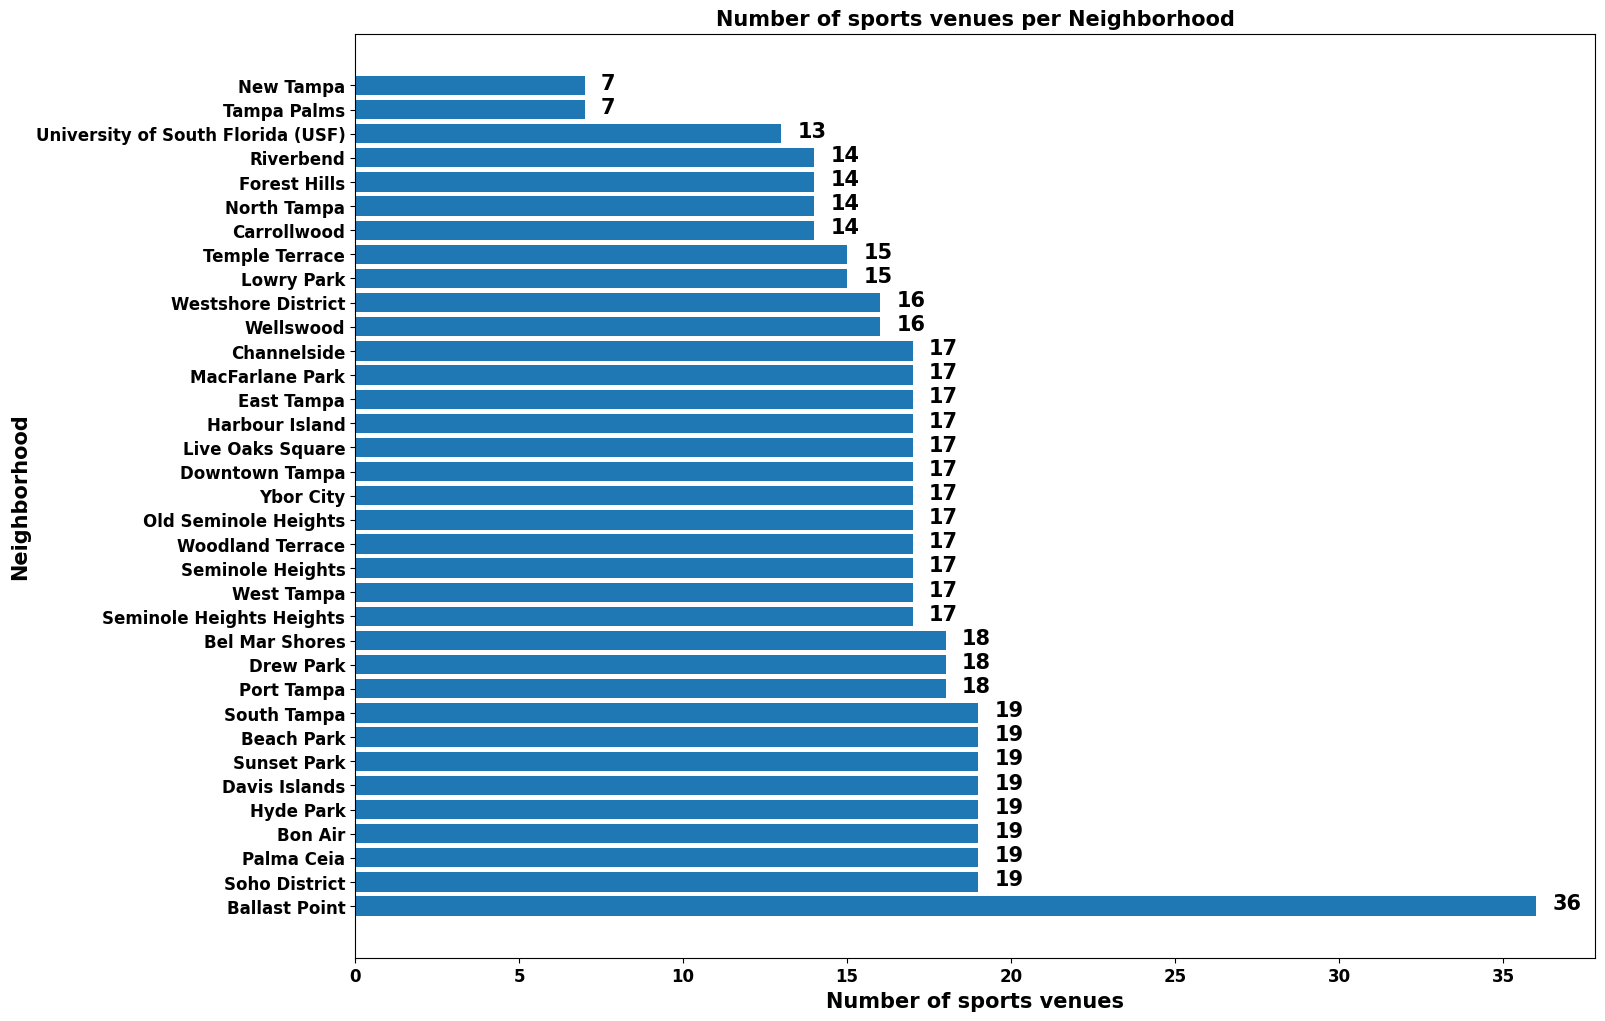

In [5]:


# Matplotlib and associated packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Neighborhood = tampa_sports_venues.groupby('Neighborhood').count().Venue.sort_values(ascending=False).reset_index()
x = list(Neighborhood['Neighborhood'])
y = list(Neighborhood['Venue'])
plt.figure(figsize=(16, 12))
plt.barh(x, y)
plt.title('Number of sports venues per Neighborhood', fontdict=dict(fontsize=15), fontweight="bold")
plt.xlabel('Number of sports venues', fontdict=dict(fontsize=15), fontweight="bold")
plt.ylabel('Neighborhood', fontdict=dict(fontsize=15), fontweight="bold")
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(y):
    plt.text(v+0.5, i-0.15, str(v), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

In [6]:
Neighborhood

,Neighborhood,Venue
0,Ballast Point,36
1,Soho District,19
2,Palma Ceia,19
3,Bon Air,19
4,Hyde Park,19
5,Davis Islands,19
6,Sunset Park,19
7,Beach Park,19
8,South Tampa,19
9,Port Tampa,18


By far, Ballast Point has the greatest number of sports related venues (36).
Soho District	19, Palma Ceia	19, Bon Air	19, Hyde Park	19, Davis Islands	19, Sunset Park	19,Beach Park	19,	South Tampa	these all ranks 2nd in terms of the number of sports venues.

Targeting neighborhoods in Ballast Point can be a great starting point for the company to set up their first store in tampa, florida.

Further, let's take a look at a map of tampa showing the different sports venues, based on the data collected so far.



In [70]:
# Create a map centered around Tampa
tampa_lat, tampa_lon = 27.9506, -82.4572  # Coordinates for Tampa, FL
tampa_sports_map = folium.Map(location=[tampa_lat, tampa_lon], zoom_start=11)

# List of all neighborhoods
neighborhoods = list(tampa_sports_venues['Neighborhood'].unique())

# Set color scheme for neighborhoods
colors_array = cm.rainbow(np.linspace(0, 1, len(neighborhoods)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to map
for lat, lon, venue, category, neighborhood in zip(tampa_sports_venues['Venue Latitude'], tampa_sports_venues['Venue Longitude'], tampa_sports_venues['Venue'], tampa_sports_venues['Venue Category'], tampa_sports_venues['Neighborhood']):
    label = 'Venue Name: {}\nVenue Category: {}\nNeighborhood: {}'.format(venue, category, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[neighborhoods.index(neighborhood)],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(tampa_sports_map)

# Display the map for sports venues in and around Tampa
tampa_sports_map

In [ ]:
# https://en.wikipedia.org/wiki/Neighborhoods_in_Tampa,_Florida

### Clustering Venues
For further analysis, let's narrow down our focus to these selected neighborhoods having a high density of sports related venues.

To select suitable neighborhoods, I have performed clustering based on the latitude and longitude values of each neighborhood. The cluster centroids will then correspond to the required suitable neighborhoods.

In [9]:
# List of selected boroughs

selected_boroughs = [
    'Ballast Point',
    'Soho District',
    'Palma Ceia',
    'Bon Air',
    'Hyde Park',
    'Davis Islands',
    'Sunset Park',
    'Beach Park',
    'South Tampa',
    'Port Tampa',
    'Drew Park',
    'Bel Mar Shores',
    'Seminole Heights Heights',
    'West Tampa',
    'Seminole Heights',
    'Woodland Terrace',
    'Old Seminole Heights',
    'Ybor City',
    'Downtown Tampa',
    'Live Oaks Square',
    'Harbour Island',
    'East Tampa',
    'MacFarlane Park',
    'Channelside',
    'Wellswood',
    'Westshore District'
]

# Filter DataFrame for sports venues for selected boroughs only
tampa_sports_venues_filtered = tampa_sports_venues[tampa_sports_venues['Neighborhood'].isin(selected_boroughs)]

# Keep only required columns
cols = ['Neighborhood', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
tampa_sports_venues_filtered = tampa_sports_venues_filtered[cols].reset_index()
tampa_sports_venues_filtered.drop(['index'], axis=1, inplace=True)
tampa_sports_venues_filtered.head(10)
print(tampa_sports_venues_filtered.shape)


(478, 5)


In [15]:
# For k-means clustering
from sklearn.cluster import KMeans

# Set number of clusters
kclusters = 4

# DataFrame with data for clustering
tampa_sports_clustering = tampa_sports_venues_filtered[['Venue Latitude', 'Venue Longitude']]

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tampa_sports_clustering)

# Add cluster labels
tampa_sports_venues_clustered = tampa_sports_venues_filtered.copy()
tampa_sports_venues_clustered['Cluster Label'] = kmeans.labels_

# Display the updated DataFrame
tampa_sports_venues_clustered.head()


,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label
0,Hyde Park,Water Works Park,27.959263,-82.462825,Park,2
1,Hyde Park,Ballast Point Park,27.889387,-82.481334,Park,2
2,Hyde Park,Lettuce Lake Park,28.073923,-82.375341,Playground,2
3,Hyde Park,North Shore Park,27.781531,-82.626478,Park,1
4,Hyde Park,Vinoy Park St Petersburg,27.778380,-82.625644,Park,1


In [17]:
# Plotting map
tampa_lat, tampa_lon = 27.9506, -82.4572  # Coordinates for Tampa, FL
map_clusters = folium.Map(location=[tampa_lat, tampa_lon], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, venue, category, cluster in zip(tampa_sports_venues_clustered['Venue Latitude'], tampa_sports_venues_clustered['Venue Longitude'], tampa_sports_venues_clustered['Venue'], tampa_sports_venues_clustered['Venue Category'], tampa_sports_venues_clustered['Cluster Label']):
    label = folium.Popup('Venue Name: {}\nVenue Category: {}\n(Cluster {})'.format(venue, category, str(cluster)), parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,
                        color=tab10[int(cluster)],
                        fill=True,
                        fill_color=tab10[int(cluster)],
                        fill_opacity=1.0).add_to(map_clusters)

# Display map with clusters
map_clusters

The following code cell creates a DataFrame to store the details about the cluster centers identified using k-means clustering performed above. It includes the latitude and longitude of the target location (cluster center), as well as the address.

In [19]:

from geopy.geocoders import Nominatim

# Create a Nominatim object for geolocation
geolocator = Nominatim(user_agent="ny_explorer")

# Coordinates of cluster centers
latitudes, longitudes, addresses = [], [], []
for center in kmeans.cluster_centers_:
    latitudes.append(center[0])
    longitudes.append(center[1])
    location = geolocator.reverse("{}, {}".format(center[0], center[1]))
    addresses.append(location.address)

# Create DataFrame
selected_locations = pd.DataFrame({'Latitude':latitudes, 'Longitude':longitudes, 'Address':addresses})
selected_locations

,Latitude,Longitude,Address
0,27.944397,-82.834800,"1447, Gulf Boulevard, Clearwater, Pinellas Cou..."
1,27.731321,-82.705155,"Broadwater, Saint Petersburg, Pinellas County,..."
2,27.977323,-82.436731,"3648, North 20th Street, Tampa, Hillsborough C..."
3,27.506577,-82.629857,"6813, 9th Avenue Northwest, Palma Sola, Manate..."


In [23]:
print(selected_locations['Address'][0])
print(selected_locations['Address'][1])
print(selected_locations['Address'][2])
print(selected_locations['Address'][3])


1447, Gulf Boulevard, Clearwater, Pinellas County, Florida, 33767, United States
Broadwater, Saint Petersburg, Pinellas County, Florida, 33711, United States
3648, North 20th Street, Tampa, Hillsborough County, Florida, 33605, United States
6813, 9th Avenue Northwest, Palma Sola, Manatee County, Florida, 34209, United States


Let's plot these target location on a map to visualize the options.

In [20]:
# Plotting map
tampa_lat, tampa_lon = 27.9506, -82.4572  # Coordinates for Tampa, FL

selected_locations_map = folium.Map(location=[tampa_lat, tampa_lon], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, addr in zip(selected_locations['Latitude'], selected_locations['Longitude'], selected_locations['Address']):
    label = folium.Popup('Address: ' + addr, parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,
                        color=tab10[1],
                        fill=True,
                        fill_color=tab10[1],
                        fill_opacity=1.0).add_to(selected_locations_map)

# Display map with clusters
selected_locations_map


# **Results and Discussion ¶**
Our analysis shows that There are 591 sports related venues in and around Tampa.

By far, Ballast Point has the greatest number of sports related venues (36).
Soho District	19, Palma Ceia	19, Bon Air	19, Hyde Park	19, Davis Islands	19, Sunset Park	19,Beach Park	19,	South Tampa	these all ranks 2nd in terms of the number of sports venues.

Targeting neighborhoods in Ballast Point can be a great starting point for the company to set up their first store in Tampa, Florida.

Upon grouping these venues into 4 different clusters, we have identified 4 locations that the company can target in order to setup their first retail store in Tampa, Florida.

These locations are:
1. 1447, Gulf Boulevard, Clearwater, Pinellas County, Florida, 33767, United States
2. Broadwater, Saint Petersburg, Pinellas County, Florida, 33711, United States
3. 3648, North 20th Street, Tampa, Hillsborough County, Florida, 33605, United States
4. 6813, 9th Avenue Northwest, Palma Sola, Manatee County, Florida, 34209, United States


Therefore, the results of our analysis provide valuable information to the company which can be used to solve the problem at hand.

# **Conclusion**
Hence, we have successfully identified 4 prime locations that can be targetted by the company, as locations to setup their first retail store in Tampa, Florida, USA.